In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn import model_selection

## Часть 1. Знакомство с данными, очистка данных, преобразование признаков

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [5]:
df.describe()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103115,377151,377185,336608,377185,285903,377185,226470,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1653,2026,297365,25405,4549,1184,39,348,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


### Очистка данных

In [6]:
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

private pool    98.891525
mls-id          93.387330
PrivatePool     89.312672
fireplace       72.661956
stories         39.957846
baths           28.192532
beds            24.200856
MlsId           17.731352
sqft            10.757851
status          10.583136
propertyType     9.208479
target           0.657767
city             0.009014
street           0.000530
dtype: float64

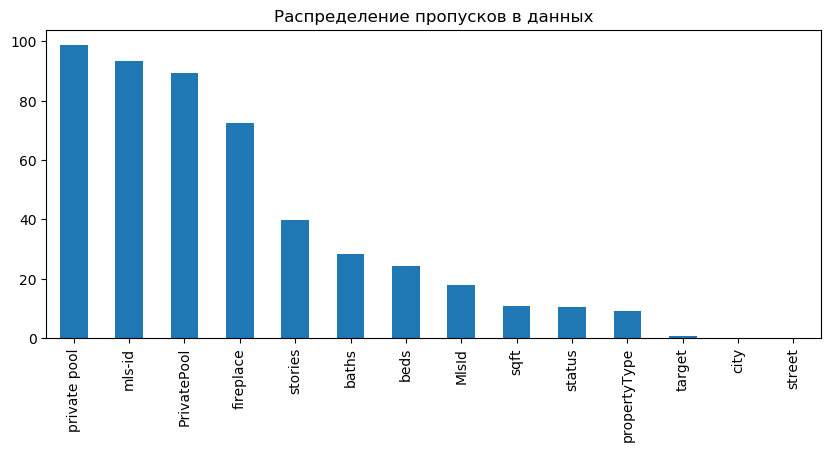

In [7]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

### Из данного графика наглядно видно, что некоторый признаки имеют очень много пропущенных значений, такие признаки можно удалить

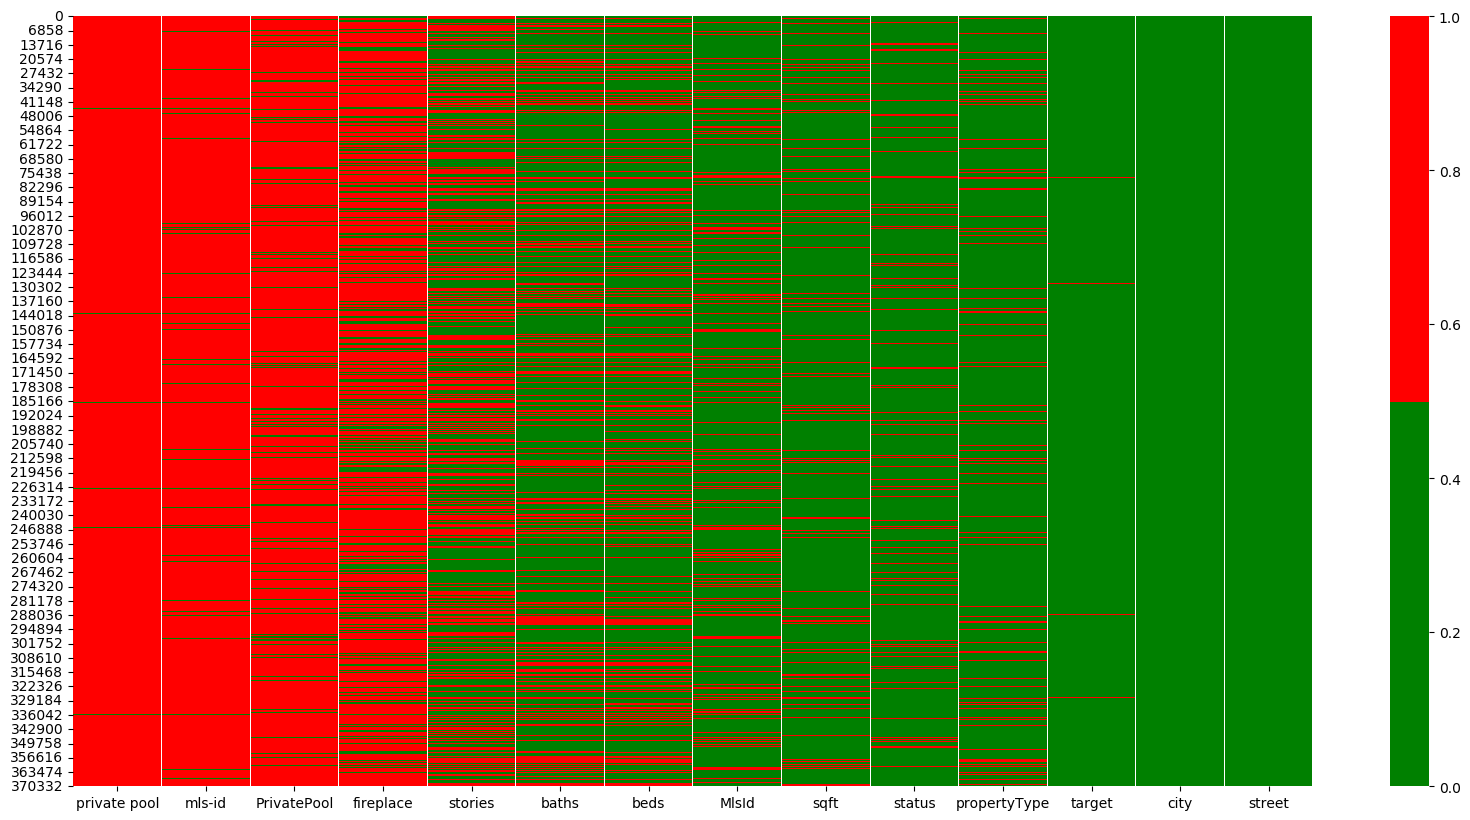

In [8]:
colors = ['green', 'red'] 
fig = plt.figure(figsize=(20, 10))
cols = cols_with_null.index
ax = sns.heatmap(
    df[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [9]:
#создаём копию исходной таблицы
new_df = df.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = new_df.shape[0] #число строк в таблице
thresh = n*0.7
new_df = new_df.dropna(how='any', thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 3 в строке
m = new_df.shape[1] #число признаков после удаления столбцов
new_df = new_df.dropna(how='any', thresh=m-1, axis=0)

### Удалим строки с пропущенными значениями в признаке target, в также дубликаты

In [10]:
new_df.dropna(subset=['target'], inplace=True)
mask=new_df.duplicated()
new_df[mask].shape[0]
new_df=new_df.drop_duplicates()
new_df.shape[0]

270760

In [11]:
display(new_df.isnull().mean())

status          0.096189
propertyType    0.016136
street          0.000000
baths           0.048408
homeFacts       0.000000
city            0.000026
schools         0.000000
sqft            0.006471
zipcode         0.000000
beds            0.022426
state           0.000000
MlsId           0.182427
target          0.000000
dtype: float64

### Теперь пропусков в столбцах стало значительно меньше

### Преобразуем признак status

In [12]:
new_df['status'] = new_df['status'].astype('category')
new_df.status.value_counts().nlargest(10)

for sale                     127935
Active                        48025
For sale                      42911
New construction               5333
Pending                        4423
foreclosure                    3890
Pre-foreclosure                1541
P                              1439
Under Contract Show            1066
Pre-foreclosure / auction       934
Name: status, dtype: int64

In [13]:
new_df['status']=new_df['status'].apply(lambda x : 'for sale' if x=='For sale' else x)

In [14]:
## Выбор самых популярных status
top_status=list(new_df['status'].value_counts().nlargest(5).index)
new_df['status'] = new_df['status'].apply(lambda x : x if x in top_status else 'other')

In [15]:
## кодируем данный признак
new_df = pd.get_dummies(new_df, columns=['status'])

In [16]:
new_df.head()

,propertyType,street,baths,homeFacts,city,schools,sqft,zipcode,beds,state,MlsId,target,status_Active,status_New construction,status_Pending,status_for sale,status_foreclosure,status_other
0,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,611019,"$418,000",1,0,0,0,0,0
1,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,201916904,"$310,000",0,0,0,1,0,0
2,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,FR19221027,"$2,895,000",0,0,0,1,0,0
3,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,14191809,"$2,395,000",0,0,0,1,0,0
5,townhouse,1624 S Newkirk St,NaN,"{'atAGlanceFacts': [{'factValue': '1920', 'fac...",Philadelphia,"[{'rating': [], 'data': {'Distance': [], 'Grad...",897 sqft,19145,2 Beds,PA,PAPH847006,"$209,000",0,0,0,1,0,0


### Преобразуем признак propertyType 

In [17]:
new_df['propertyType']=new_df['propertyType'].apply(lambda x : 'Single Family' if x in ['single-family home','Single Family Home'] else x)
new_df['propertyType']=new_df['propertyType'].apply(lambda x : 'Condo' if x == 'condo' else x)
new_df['propertyType']=new_df['propertyType'].apply(lambda x : 'townhouse' if x == 'Townhouse' else x)
new_df['propertyType']=new_df['propertyType'].apply(lambda x : 'multi-family' if x == 'Multi Family' else x)

In [18]:
## Выбор самых популярных propertyType
top_status=list(new_df['propertyType'].value_counts().nlargest(10).index)
new_df['propertyType'] = new_df['propertyType'].apply(lambda x : x if x in top_status else 'other')

In [19]:
## кодируем данный признак
new_df = pd.get_dummies(new_df, columns=['propertyType'])

### Удалим прзнак street,zipcode и MlsId, так как они является неинформативным

In [20]:
new_df=new_df.drop('street',axis=1)
new_df=new_df.drop('zipcode',axis=1)
new_df=new_df.drop('MlsId',axis=1)

In [21]:
new_df.head()

,baths,homeFacts,city,schools,sqft,beds,state,target,status_Active,status_New construction,...,propertyType_Condo/Townhome/Row Home/Co-Op,propertyType_Land,propertyType_Multi-Family Home,propertyType_Single Family,propertyType_Traditional,propertyType_lot/land,propertyType_mobile/manufactured,propertyType_multi-family,propertyType_other,propertyType_townhouse
0,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,4,NC,"$418,000",1,0,...,0,0,0,1,0,0,0,0,0,0
1,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",3 Beds,WA,"$310,000",0,0,...,0,0,0,1,0,0,0,0,0,0
2,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",3 Beds,CA,"$2,895,000",0,0,...,0,0,0,1,0,0,0,0,0,0
3,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",5 Beds,TX,"$2,395,000",0,0,...,0,0,0,1,0,0,0,0,0,0
5,NaN,"{'atAGlanceFacts': [{'factValue': '1920', 'fac...",Philadelphia,"[{'rating': [], 'data': {'Distance': [], 'Grad...",897 sqft,2 Beds,PA,"$209,000",0,0,...,0,0,0,0,0,0,0,0,0,1


### Преобразуем признак baths

In [22]:
values={'baths': '2'}
new_df=new_df.fillna(values)

In [23]:
new_df['baths']=new_df['baths'].astype('str')
new_df['baths']=new_df['baths'].apply(lambda x: x.split()[1] if x.split()[0][0] == 'B' else x.split()[0])

In [24]:
new_df['baths']=new_df['baths'].apply(lambda x: x.split(',')[0])
new_df['baths']=new_df['baths'].apply(lambda x: '2' if x=='~' else x)
new_df['baths']=new_df['baths'].apply(lambda x: x[0])
new_df['baths']=new_df['baths'].apply(lambda x: '2' if x in ['S','-','—'] else x)
new_df['baths']=new_df['baths'].astype('int')

### Преобразуем признак city

In [25]:
new_df['city'].nunique()

1743

In [26]:
### Преобразуем данных признак с помощью бинарного кодирования
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['city']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(new_df['city'])
bin_df = pd.concat([new_df, type_bin], axis=1)

new_df=bin_df
new_df

,baths,homeFacts,city,schools,sqft,beds,state,target,status_Active,status_New construction,...,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10
0,3,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,4,NC,"$418,000",1,0,...,0,0,0,0,0,0,0,0,0,1
1,3,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",3 Beds,WA,"$310,000",0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",3 Beds,CA,"$2,895,000",0,0,...,0,0,0,0,0,0,0,0,1,1
3,8,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",5 Beds,TX,"$2,395,000",0,0,...,0,0,0,0,0,0,0,1,0,0
5,2,"{'atAGlanceFacts': [{'factValue': '1920', 'fac...",Philadelphia,"[{'rating': [], 'data': {'Distance': [], 'Grad...",897 sqft,2 Beds,PA,"$209,000",0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377179,3,"{'atAGlanceFacts': [{'factValue': '2010', 'fac...",Washington,"[{'rating': ['3/10', '3/10'], 'data': {'Distan...","1,417",2,DC,"$799,000",0,0,...,0,0,0,0,0,1,0,0,1,0
377180,6,"{'atAGlanceFacts': [{'factValue': '1990', 'fac...",Miami,"[{'rating': ['10/10', '5/10'], 'data': {'Dista...","4,017",5,FL,"$1,249,000",0,0,...,0,0,0,0,0,1,1,0,1,1
377181,3,"{'atAGlanceFacts': [{'factValue': '1924', 'fac...",Chicago,"[{'rating': ['1/10', '5/10', '7/10'], 'data': ...","2,000 sqft",3 Beds,IL,"$674,999",0,0,...,0,0,0,0,1,0,1,0,0,0
377182,3,"{'atAGlanceFacts': [{'factValue': '1950', 'fac...",Jamaica,"[{'rating': ['5/10', '4/10'], 'data': {'Distan...","1,152 sqft",3 Beds,NY,"$528,000",0,0,...,0,0,0,1,0,0,1,1,0,1


In [27]:
new_df=new_df.drop('city',axis=1)

In [28]:
new_df.head()

,baths,homeFacts,schools,sqft,beds,state,target,status_Active,status_New construction,status_Pending,...,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10
0,3,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...","[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,4,NC,"$418,000",1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...","[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",3 Beds,WA,"$310,000",0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...","[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",3 Beds,CA,"$2,895,000",0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,8,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...","[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",5 Beds,TX,"$2,395,000",0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,2,"{'atAGlanceFacts': [{'factValue': '1920', 'fac...","[{'rating': [], 'data': {'Distance': [], 'Grad...",897 sqft,2 Beds,PA,"$209,000",0,0,0,...,0,0,0,0,0,0,0,1,0,1


### Перобразуем признак schools. Распарсим данный признак и созданим новые признаки: Средний рейтинг школ, среднее расстояние до них и количество школ

In [29]:
import ast
new_df['schools'] = new_df['schools'].apply(ast.literal_eval)

In [30]:
new_df['rating'] = new_df['schools'].apply(lambda x: x[0]['rating'])

In [31]:
new_df['distance'] = new_df['schools'].apply(lambda x: x[0]['data']['Distance'])

In [32]:
new_df['school_count'] = new_df['schools'].apply(lambda x: len(x[0]['name']))

In [33]:
new_df=new_df.drop('schools',axis=1)

In [34]:
### Преобразуем rating таким образом, чтобы можно было получить среднее значение
new_df['rating']=new_df['rating'].apply(lambda x : '0' if len(x)==0 else [i[0] if len(i)==4 else i[:2] for i in x])
new_df['rating']=new_df['rating'].apply(lambda x :  [i for i in x if i!='NR'])
new_df['rating']=new_df['rating'].apply(lambda x :  [i for i in x if i!='No'])
new_df['rating']=new_df['rating'].apply(lambda x :  [i for i in x if i!='NA'])
new_df['rating']=new_df['rating'].apply(lambda x :  [i for i in x if i!=''])
new_df['rating']=new_df['rating'].apply(lambda x : 0 if x=='' else x)

In [35]:
new_df['rating']=new_df['rating'].apply(lambda x: np.mean([float(i) for i in x]))
median_raiting=new_df['rating'].median()
new_df['avg_school_rating']=new_df['rating'].apply(lambda x: median_raiting if x==0 else x)
new_df['avg_school_rating']=new_df['avg_school_rating'].fillna(new_df['avg_school_rating'].median())
new_df['avg_school_rating']=new_df['avg_school_rating'].astype('float32')

c:\Users\user1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [36]:
new_df=new_df.drop('rating',axis=1)

In [37]:
### Преобразуем distance таким образом, чтобы можно было получить среднее значение
new_df['distance']=new_df['distance'].apply(lambda x : [i.replace(' mi','') for i in x])
new_df['distance']=new_df['distance'].apply(lambda x : [i.replace('mi','') for i in x])
new_df['distance']=new_df['distance'].apply(lambda x: np.mean([float(i) for i in x]))
new_df['avg_school_distance']=new_df['distance'].fillna(new_df['distance'].median())
new_df=new_df.drop('distance',axis=1)

c:\Users\user1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


### Преобразуем признак sqft

In [38]:
new_df['sqft']=new_df['sqft'].astype('str')

In [39]:
new_df['sqft']=new_df['sqft'].apply(lambda x: x.split()[0] if x.split()[0]!='Total' else x.split()[4])

In [40]:
new_df['sqft']=new_df['sqft'].apply(lambda x: x.replace(',',''))

In [41]:
new_df['sqft']=new_df['sqft'].apply(lambda x: 0 if x=='nan' else x)
new_df['sqft']=new_df['sqft'].apply(lambda x: 0 if x=='--' else x)
new_df['sqft']=new_df['sqft'].apply(lambda x: 0 if x=='610-840' else x)
new_df['sqft']=new_df['sqft'].astype('int')
median_sqft=new_df['sqft'].median()

In [42]:
new_df['sqft']=new_df['sqft'].apply(lambda x: median_sqft if x==0 else x)

### Преобразуем признак state (бинарная кодировка)

In [43]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['state']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(new_df['state'])
bin_df = pd.concat([new_df, type_bin], axis=1)

new_df=bin_df

In [44]:
new_df=new_df.drop('state',axis=1)

### Преобразуем признак homeFacts. Распарсим содержимое в этом столбце и на основе этого создадим новые признаки.

In [45]:
new_df['homeFacts'][0]

"{'atAGlanceFacts': [{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': 'Central A/C, Heat Pump', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': '$144', 'factLabel': 'Price/sqft'}]}"

In [46]:
def parse_homefacts(row):
    homefacts_dict = eval(row['homeFacts'])
    atAGlanceFacts_list = homefacts_dict['atAGlanceFacts']
    result_dict = {}
    for fact in atAGlanceFacts_list:
        result_dict[fact['factLabel']] = fact['factValue']
    return pd.Series(result_dict)

# Создание новых столбцов на основе распарсенной информации
new_df[['Year_built', 'Remodeled_year', 'Heating', 'Cooling', 'Parking', 'lotsize', 'Price/sqft']] = new_df.apply(lambda row: parse_homefacts(row), axis=1)

# удалим признак homeFacts
new_df=new_df.drop('homeFacts',axis=1)

#### И теперь немного преобразуем получившиеся столбцы

In [47]:
new_df['Year_built']=new_df['Year_built'].apply(lambda x : '2019' if x=='' else x)
new_df['Year_built']=new_df['Year_built'].apply(lambda x : '2019' if x=='No data' else x)
new_df['Year_built']=new_df['Year_built'].apply(lambda x : '2019' if x=='No Data' else x)
new_df['Year_built']=new_df['Year_built'].fillna('2019')
new_df['Year_built']=new_df['Year_built'].astype('float')
new_df['Year_built']=new_df['Year_built'].astype('int')
### Удалим столбец Remodeled year, Parking,lotsize так как в них много пропусков и Cooling(неинформативно)
new_df=new_df.drop('Remodeled_year',axis=1)
new_df=new_df.drop('Parking',axis=1)
new_df=new_df.drop('Cooling',axis=1)
new_df=new_df.drop('lotsize',axis=1)

In [48]:
new_df['Heating']=new_df['Heating'].apply(lambda x: 'Forced Air' if x=='Forced air' or x =='' else x)
## Выбор самых популярных Heating
top_status=list(new_df['Heating'].value_counts().nlargest(4).index)
new_df['Heating'] = new_df['Heating'].apply(lambda x : x if x in top_status else 'Other')
## кодируем данный признак
new_df = pd.get_dummies(new_df, columns=['Heating'])

In [49]:
new_df['Price/sqft']=new_df['Price/sqft'].fillna('0')
new_df['Price/sqft']=new_df['Price/sqft'].apply(lambda x: x.replace('$',''))
new_df['Price/sqft']=new_df['Price/sqft'].apply(lambda x: x.replace(',',''))
new_df['Price/sqft']=new_df['Price/sqft'].apply(lambda x: x.replace('/sqft',''))
new_df['Price/sqft']=new_df['Price/sqft'].apply(lambda x: x.replace(' / Sq. Ft.',''))
new_df['Price/sqft']=new_df['Price/sqft'].apply(lambda x: '0' if x=='' else x)
new_df['Price/sqft']=new_df['Price/sqft'].apply(lambda x: '0' if x=='No Info' else x)
new_df['Price/sqft']=new_df['Price/sqft'].apply(lambda x: '0' if x=='No Data' else x)

In [50]:
new_df['Price/sqft']=new_df['Price/sqft'].astype('int')
media_value=new_df['Price/sqft'].median()
new_df['Price/sqft']=new_df['Price/sqft'].apply(lambda x: media_value if x==0 else x)

### Преобразуем признак target

In [51]:
## Приведём данный признак к виду целого числа
new_df['target']=new_df['target'].apply(lambda x: x.replace('$',''))
new_df['target']=new_df['target'].apply(lambda x: x.replace(',',''))
new_df['target']=new_df['target'].apply(lambda x: x.replace('+',''))
new_df['target']=new_df['target'].apply(lambda x: x.replace('/mo',''))
new_df['target']=new_df['target'].apply(lambda x: x.replace('1215 - 1437','1326'))
new_df['target']=new_df['target'].astype('int')


### Преобразуем признак beds

In [52]:
new_df['beds']=new_df['beds'].astype('str')

In [53]:
new_df['beds']=new_df['beds'].fillna('3')
new_df['beds']=new_df['beds'].apply(lambda x: '3'  if x=='nan' else x)
new_df['beds']=new_df['beds'].apply(lambda x: '3'  if x=='' else x)

In [54]:
new_df['beds']=new_df['beds'].apply(lambda x: x.replace('Beds',''))
new_df['beds']=new_df['beds'].apply(lambda x: x.replace('sqft',''))
new_df['beds']=new_df['beds'].apply(lambda x: x.replace('bd',''))
new_df['beds']=new_df['beds'].apply(lambda x: x.replace(',',''))
new_df['beds']=new_df['beds'].apply(lambda x: x.replace(',',''))
new_df['beds']=new_df['beds'].apply(lambda x: x.replace('.0',''))
new_df['beds']=new_df['beds'].apply(lambda x: x.replace('Baths','3'))
new_df['beds']=new_df['beds'].apply(lambda x: x.replace('--','3'))


In [55]:
new_df['beds']=new_df['beds'].apply(lambda x: x.replace(' ',''))

In [56]:
## Выбор наиболее часто встречающегося количества beds
top_status=list(new_df['beds'].value_counts().nlargest(10).index)
new_df['beds'] = new_df['beds'].apply(lambda x : x if x in top_status else 'other')
## кодируем данный признак
new_df = pd.get_dummies(new_df, columns=['beds'])

In [57]:
new_df.shape

(270760, 57)

## В результате очистки и преобразования признаков размер датасета составляет 270760 строк и 57 столбцов

In [58]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270760 entries, 0 to 377184
Data columns (total 57 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   baths                                       270760 non-null  int32  
 1   sqft                                        270760 non-null  float64
 2   target                                      270760 non-null  int32  
 3   status_Active                               270760 non-null  uint8  
 4   status_New construction                     270760 non-null  uint8  
 5   status_Pending                              270760 non-null  uint8  
 6   status_for sale                             270760 non-null  uint8  
 7   status_foreclosure                          270760 non-null  uint8  
 8   status_other                                270760 non-null  uint8  
 9   propertyType_Condo                          270760 non-null  uint8  
 

In [59]:
def show_corr_heatmap(columns_list, title, method):
    """Построения корреляционной диаграммы"""
    fig_, ax_ = plt.subplots(figsize=(15, 12))
    corr = new_df[columns_list].corr(method=method)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, 
                annot=True, 
                linewidths=0.1, 
                ax=ax_, 
                mask=mask, 
                cmap='viridis',
                fmt='.1g')
    ax_.set_title(title, fontsize=18)
    plt.show()

In [60]:
# разобьем названия столбцов на два списка, список с непрервымными и категориальными значениями
colums_names = list(new_df.columns)
num_cols=['baths','sqft','school_count','avg_school_rating','avg_school_distance','Year_built','Price/sqft','target']
cat_cols =colums_names[3:31]+colums_names[34:40]+colums_names[42:]

In [61]:
new_df['sqft']=new_df['sqft'].astype('int')
new_df['school_count']=new_df['school_count'].astype('int')
new_df['avg_school_distance']=new_df['avg_school_distance'].astype('float32')
new_df['Price/sqft']=new_df['Price/sqft'].astype('float32')

In [62]:
def show_corr_heatmap(columns_list, title, method):
    """Построения корреляционной диаграммы"""
    fig_, ax_ = plt.subplots(figsize=(16, 16))
    corr = new_df[columns_list].corr(method=method)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, 
                annot=True, 
                linewidths=0.1, 
                ax=ax_, 
                mask=mask, 
                cmap='viridis',
                fmt='.1g')
    ax_.set_title(title, fontsize=18)
    plt.show()

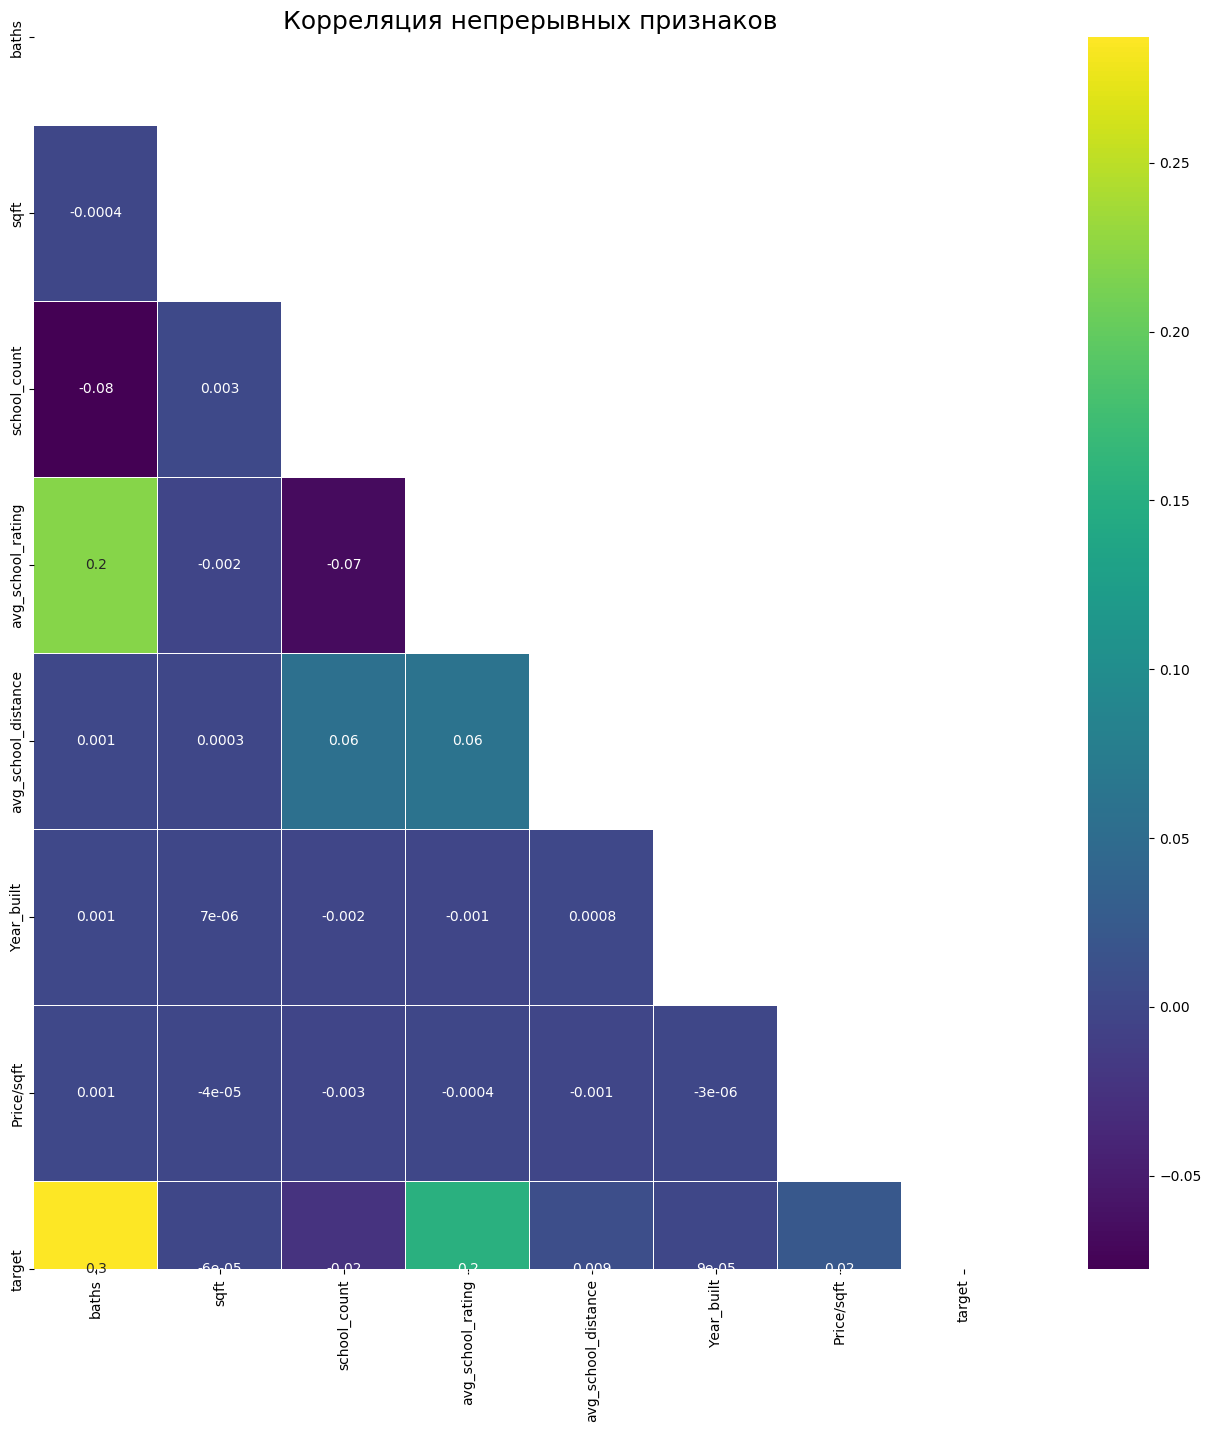

In [63]:
show_corr_heatmap(num_cols, 'Корреляция непрерывных признаков', method='pearson');

### Исходя из данног графика, можно судить об отсутствии мультиколлинеарности для непрерывных признаков

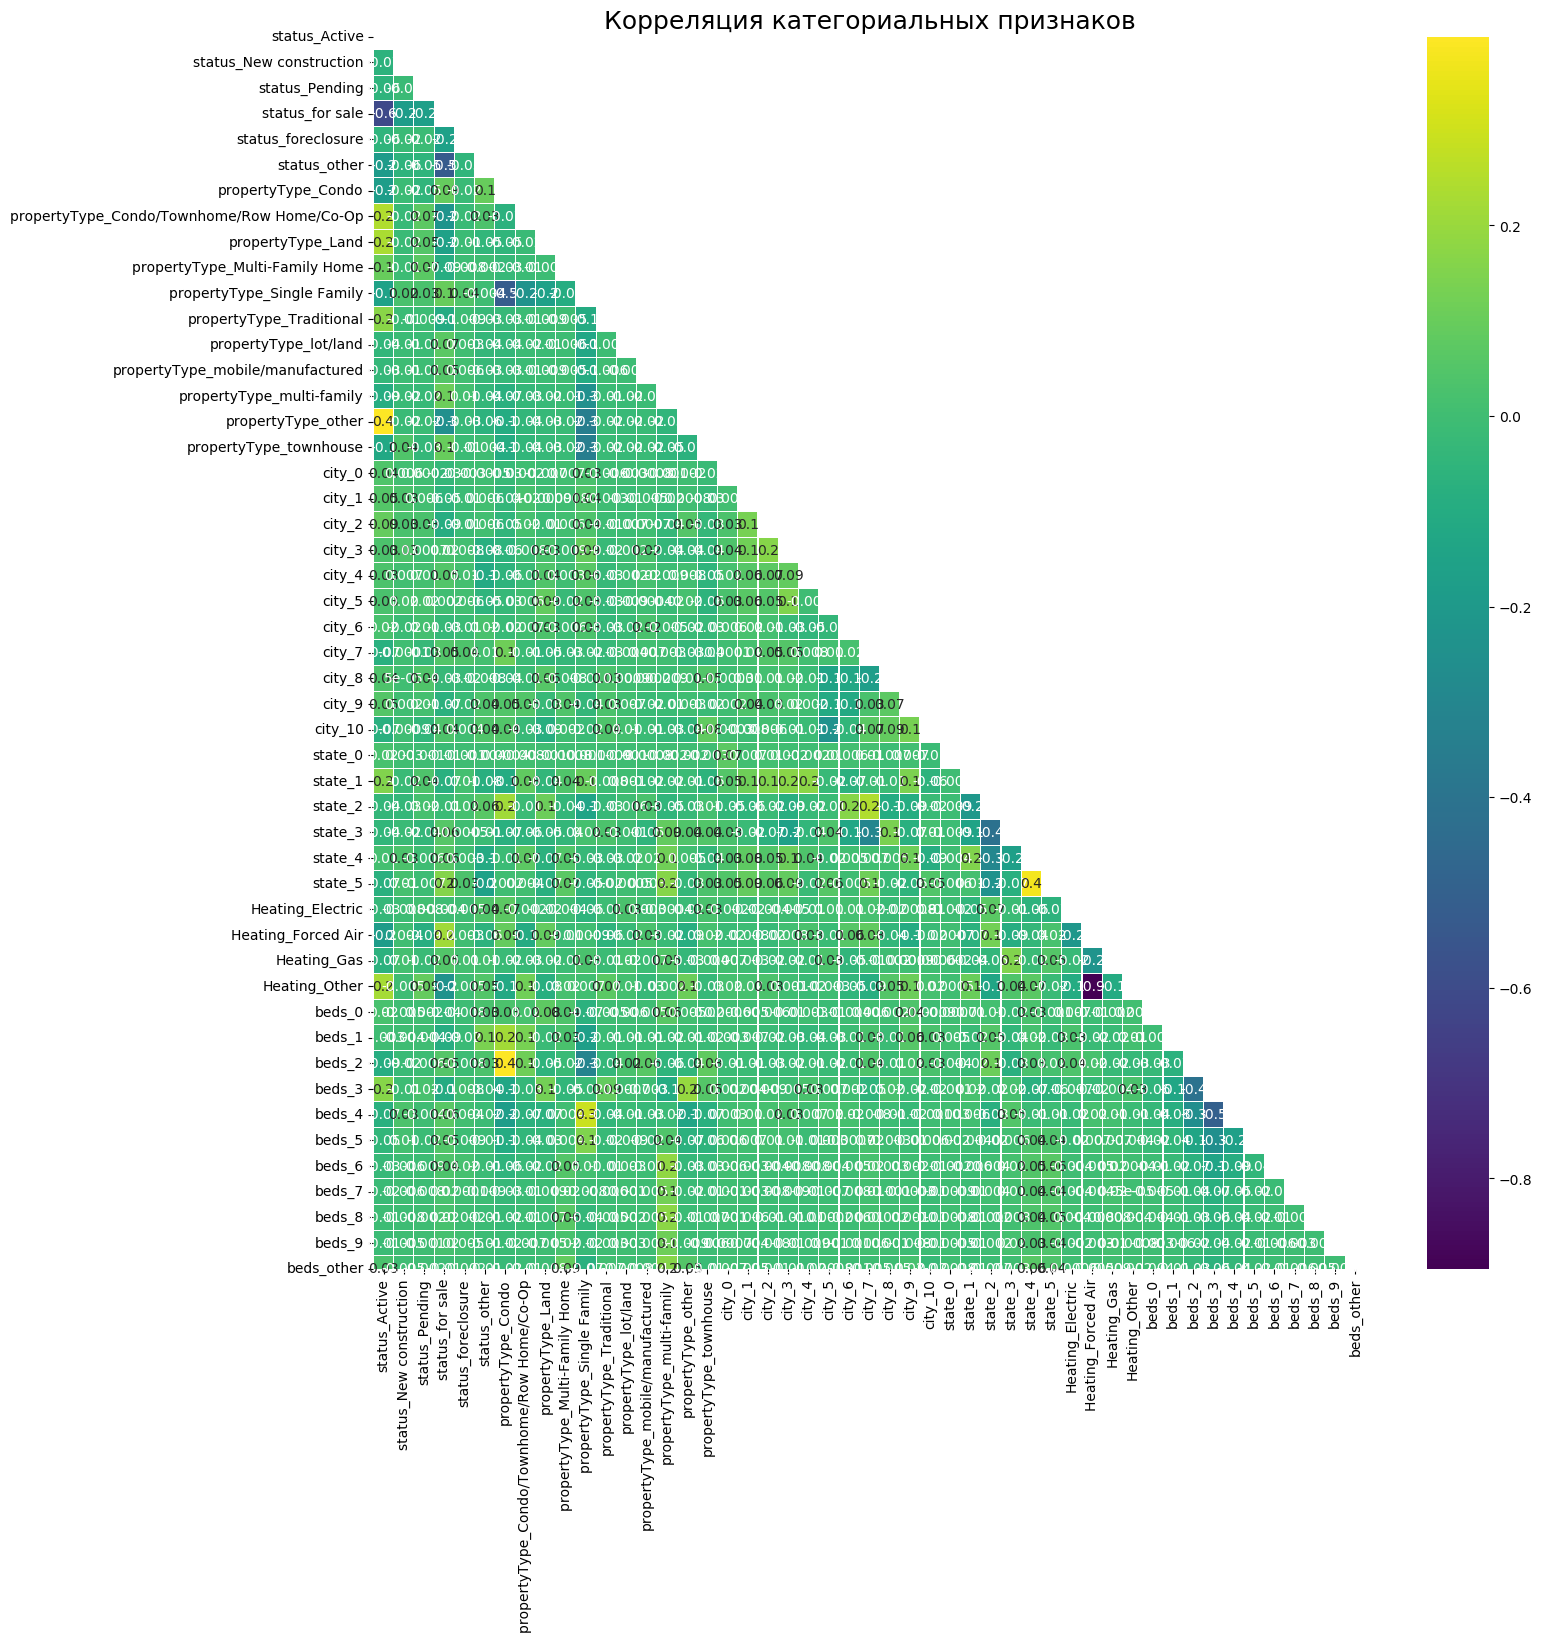

In [64]:
# строю диаграмму для категориальных признаков:
show_corr_heatmap(
    cat_cols, 
    'Корреляция категориальных признаков', 
    method='spearman'
);

### Исходя из корреляционного анализа, можно наблюдать высокое значение корреляции между признаками Heating_Forced_Air и Heating_other. Удалим один признака Heating_other

In [65]:
new_df=new_df.drop('Heating_Other',axis=1)

# Оценим значимость признаков

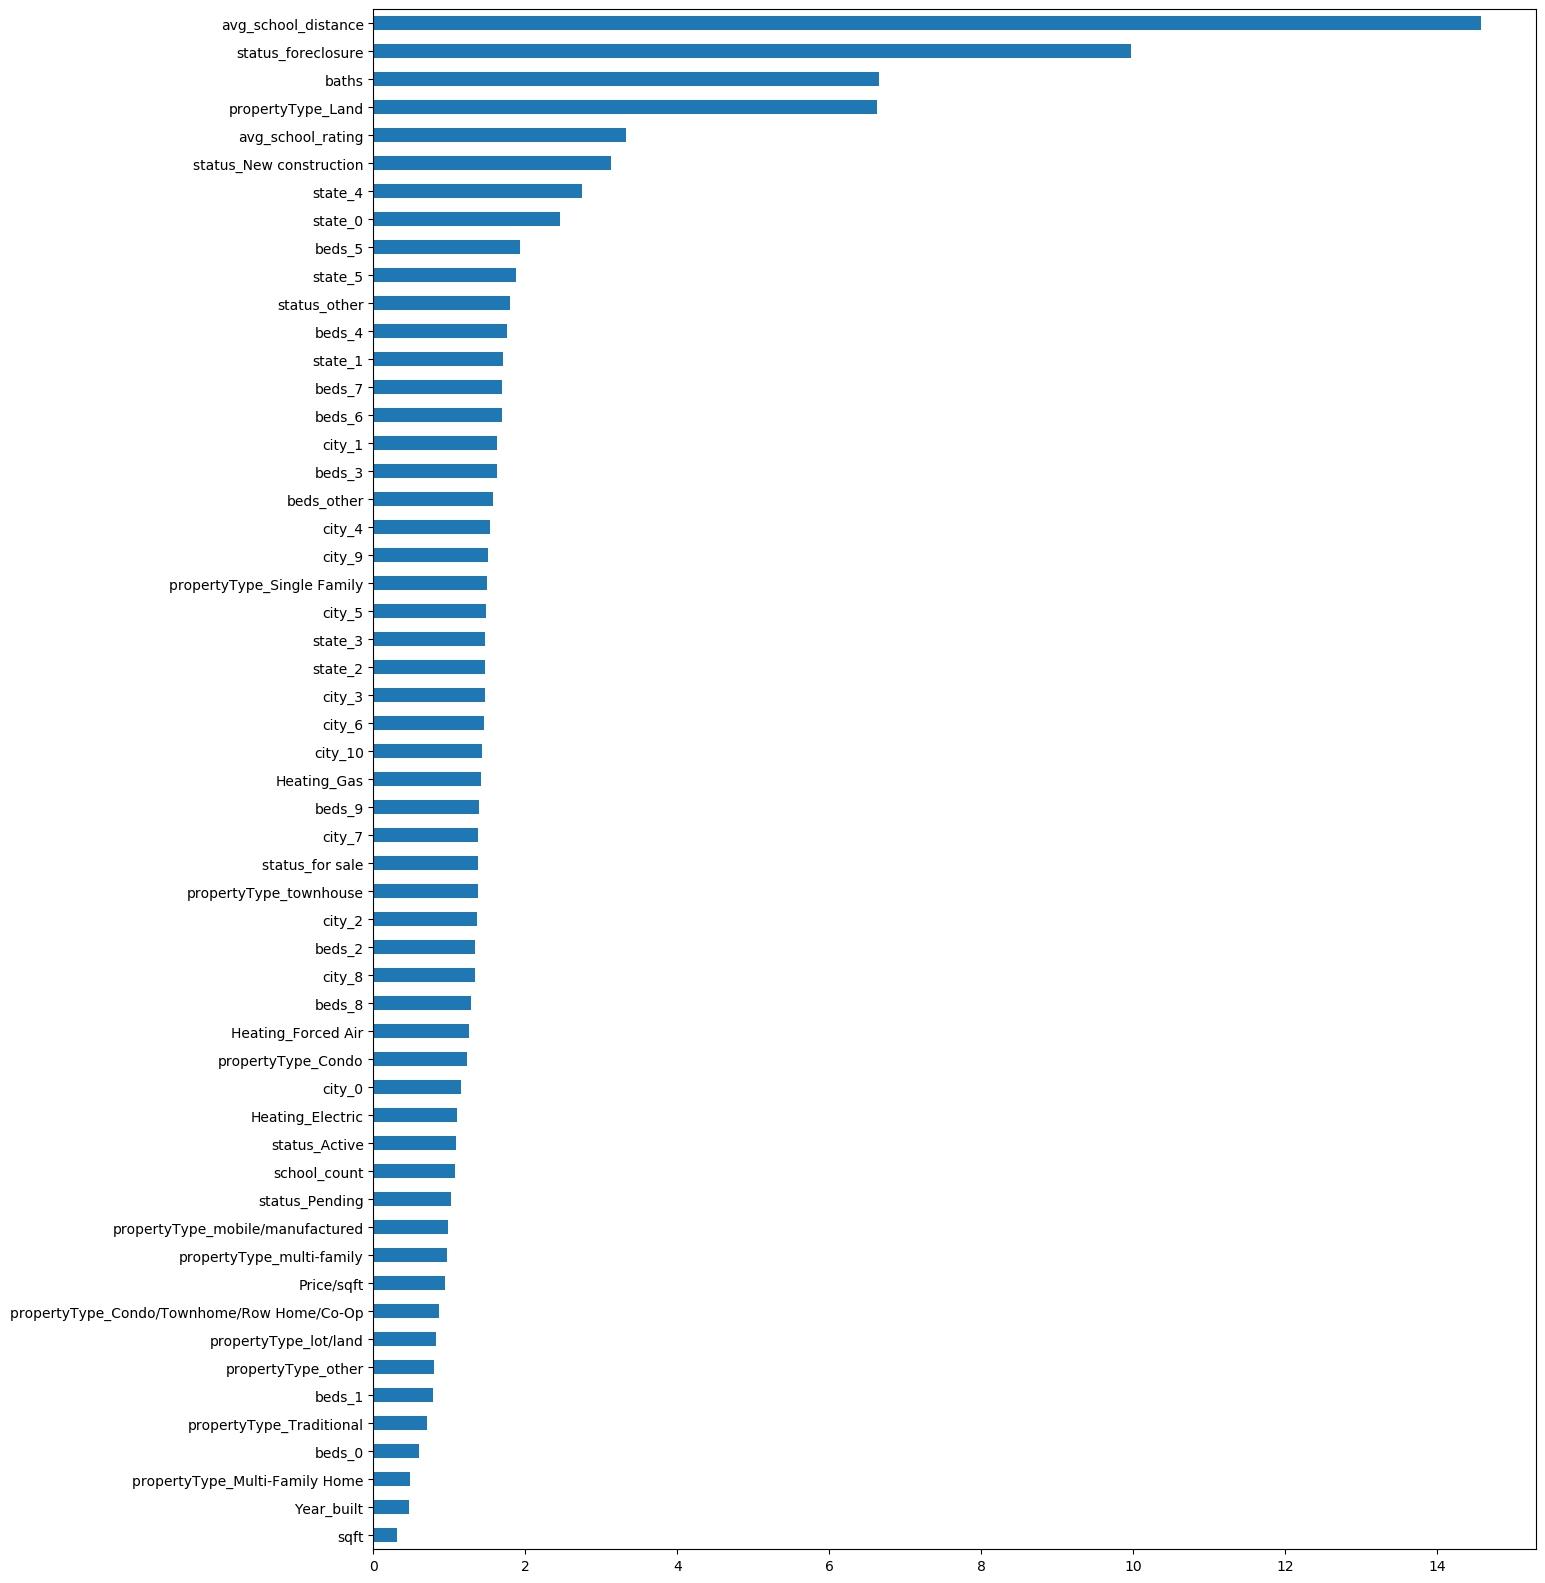

In [66]:
from sklearn.feature_selection import f_classif
y = new_df.target.values
X = new_df.drop('target', axis=1)

# визуализируем результат анализа значимости:
imp_num = pd.Series(f_classif(X[X.columns], y)[0], index = X.columns)
imp_num.sort_values(inplace = True)

fig5, ax5 = plt.subplots(figsize=(15, 20))
imp_num.plot(kind = 'barh');

In [67]:
#Удалим признаки с низкой значимостью
new_df=new_df.drop(["sqft","Year_built","propertyType_Multi-Family Home","beds_0"], axis=1)

In [68]:
print('Итоговое количество признаков ',len(new_df.columns))

Итоговое количество признаков  52


# Приступаем к обучению модели

### Итерация 1
Попробуем решить задачу с помощью простой линейной регрессии

In [69]:
y = new_df.target.values # наш таргет
X = new_df.drop(['target'], axis=1)

In [70]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
### Вкачестве целевой метриуи возьмём Метрику Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку.
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    # print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    # print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [72]:
# Создаём модель
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train MAE: 527432.703
Train MAPE: 1808.608


Test MAE: 528540.889
Train MAPE: 2417.789


### В результате получили очень плохие результаты метрик

### Итерация 2

Попробуем решить данную задачу с использование RandomForestRegressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=120, verbose=1, n_jobs=-1, random_state=42)

In [74]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred_test
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   47.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    2.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.9s finished


In [75]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку.
from sklearn import metrics
print('test_MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_test))

print('train_MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred_train))

test_MAPE: 7.098123208659001
train_MAPE: 2.3386905116334407


### Показания метрик значительно улчучшились, однака модель является немного переобученной

### Итерация 3

Попробуем использовать стекинг

In [76]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor

In [77]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42,max_depth=12,min_samples_leaf=5))
]

In [78]:
# Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators, #базовые модели в стекинге
    final_estimator=RandomForestRegressor( #метамодель
        n_estimators=100, #количество деревьев в ансамбле                    
        random_state=42 #датчик генератора случайных чисел
    )
)
# Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('dt',
                               DecisionTreeRegressor(max_depth=12,
                                                     min_samples_leaf=5,
                                                     random_state=42))],
                  final_estimator=RandomForestRegressor(random_state=42))

In [79]:
# Формируем предсказание для тестовой выборки
y_pred_stack_train = reg.predict(X_train)
y_pred_stack_test = reg.predict(X_test)
# Оцениваем качество по метрике MSE
print('train_MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred_stack_train))
print('test_MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_stack_test))

# Будет выведено:
# Качество предсказания по MSE для стекинга 3464.11

train_MAPE: 9.613959751611205
test_MAPE: 12.831002985288885


В результате использования стекинга модель не удалось улучшить

### Используем XGBRegressor

In [100]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=200)

In [101]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [102]:
print('test_MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_test))
print('train_MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred_train))

test_MAPE: 9.291279081049634
train_MAPE: 7.775266219310736


В результате получилось неплохая модель, которая не сильно переобучена

### Попробуем оптимизировать гиперпараметры для XGBRegressor

In [105]:
from sklearn.metrics import mean_absolute_percentage_error
from hyperopt import hp, fmin, tpe, Trials
# Define the hyperparameter search space
space = {
    'n_estimators': hp.choice('n_estimators', range(100, 1000)),
}

# Define the objective function
def objective(params):
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return mape

# Run the hyperparameter optimization using hyperopt
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=15, trials=trials)

100%|██████████| 15/15 [09:36<00:00, 38.42s/trial, best loss: 7.368865504989859]


In [110]:
# рассчитаем точность для тестовой выборки
model = XGBRegressor(
    random_state=42, 
    n_estimators=int(best['n_estimators']),
)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('test_MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('train_MAPE:', metrics.mean_absolute_percentage_error(y_train, y_train_pred))

test_MAPE: 8.620108141205261
train_MAPE: 6.598590138259204


### В результате подбора гиперпараметров, удалось улучшить качество модели

## Сохраним модель в файл pkl

In [114]:
import pickle
# Производим сериализацию и записываем результат в файл формата pkl
with open('myfile.pkl', 'wb') as output:
    pickle.dump(model, output)

### В результате проделанной работы была получена модель, которая может быть применима в производственной среде